In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import numpy as np

In [2]:
bus_data_normal = pickle.load(open('output/bus_data_normal_traffic.pkl', 'rb'))

In [3]:
bus_data_remove_traffic = pickle.load(open('output/bus_data_removed_background.pkl', 'rb'))

Route10C_trip174069020_06:30:00


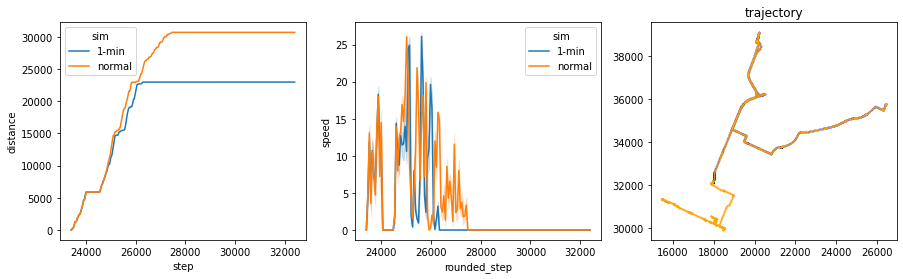


Route10G_trip174102020_06:30:00


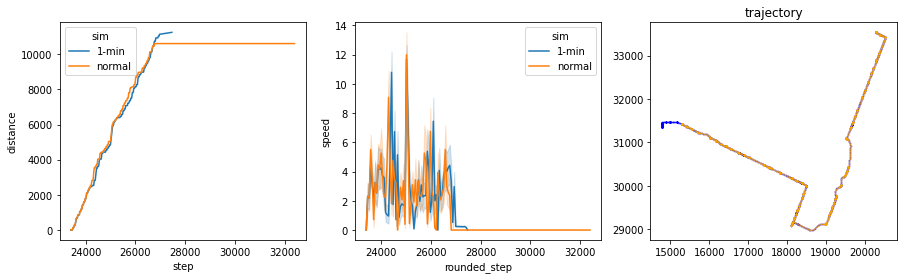


Route16_trip174568020_06:30:00


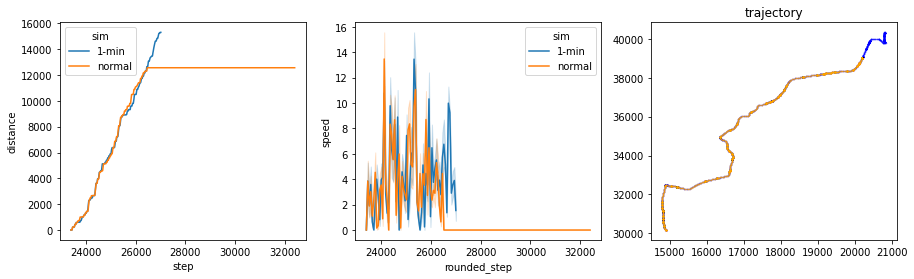


Route16_trip174596020_06:30:00


In [ ]:
plt.rcParams["figure.figsize"] = (15,4)

for bus_id in bus_data_remove_traffic:
    if ((len(bus_data_normal[bus_id]) == 0) & (len(bus_data_remove_traffic[bus_id]) != 0)):
        print(bus_id, " doesn't move in normal-traffic sim but move in no-background traffic sim")
        continue

    print(bus_id)
    df_normal = pd.DataFrame(bus_data_normal[bus_id])
    df_normal['sim'] = 'normal'
    df_1m = pd.DataFrame(bus_data_remove_traffic[bus_id])
    df_1m['sim'] = '1-min'
    df_plt = df_1m.append(df_normal).reset_index()
    df_plt['position'] = df_plt['position'].apply(np.array)
    df_plt['rounded_step'] = round(df_plt['step']/60)*60
    
    f, axes = plt.subplots(1, 3)

    sns.lineplot(data=df_plt, x='step', y='distance', hue='sim', ax=axes[0])
    sns.lineplot(data=df_plt, x='rounded_step', y='speed', hue='sim', ax=axes[1])
    normal_traj = np.array(df_normal['position'].tolist())
    remove_traj = np.array(df_1m['position'].tolist())
    
    axes[2].scatter(remove_traj[:, 0], remove_traj[:, 1], s=0.3, c='b', label='1-min', alpha=0.5)
    axes[2].scatter(normal_traj[:, 0], normal_traj[:, 1], s=0.3, c='orange', label='normal', alpha=0.5)
    plt.title('trajectory')
    plt.show()
    print()